# Análise dos vereadores reeleitos de São José dos Campos


In [578]:
#Importação de bibliotecas
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [223]:
#Dados Brutos

candidatos2016 = pd.read_csv(r'datasets/consulta_cand_2016_SP.csv', delimiter=';', encoding='latin-1', usecols=['SQ_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'NM_UE', 'NR_CPF_CANDIDATO'])
candidatos2020 = pd.read_csv(r'datasets/consulta_cand_2020_SP.csv', delimiter=';', encoding='latin-1', usecols=['SQ_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'NM_UE', 'NR_CPF_CANDIDATO'])

bens_2016 = pd.read_csv(r'datasets/bem_candidato_2016_SP.csv', delimiter=';', encoding='latin-1', decimal=',', usecols=['SQ_CANDIDATO','VR_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO'])
bens_2020 = pd.read_csv(r'datasets/bem_candidato_2020_SP.csv', delimiter=';', encoding='latin-1', decimal=',', usecols=['SQ_CANDIDATO','VR_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO'])

# Vereadores reeleitos de São José dos Campos

Eleição 2016:

* Dulce Rita (PSDB) - 8.459 (2,43%) -                   | 250000042617 
* Dr. Elton (MDB) - 7.395 (2,13%) -                     | 250000037148
* Amélia Naomi (PT) - 5.240 (1,51%) -                   | 250000033606
* Marcão da Academia ao Ar Livre (DEM) - 4.470 (1,28%)  | 250000014482
* Robertinho da Padaria (Cidadania) - 4.412 (1,27%)     | 250000022736
* Juvenil Silvério (PSDB) - 4.119 (1,18%) -             | 250000042628
* Lino Bispo (PL) - 3.841 (1,10%) -                     | 250000040046
* Roberto do Eleven (PSDB) - 3.711 (1,07%) -            | 250000050545
* Walter Hayashi (PSC) - 2.885 (0,83%) -                | 250000037122
* Juliana Fraga (PT) - 2.689 (0,77%) -                  | 250000033624
* Zé Luís (PSD) - 1.908 (0,55%) -                       | 250000013030


Eleição 2020:

* Dulce Rita (PSDB) - 8.459 (2,43%) -                   | 250000693458 
* Dr. Elton (MDB) - 7.395 (2,13%) -                     | 250000637943
* Amélia Naomi (PT) - 5.240 (1,51%) -                   | 250000753710
* Marcão da Academia ao Ar Livre (DEM) - 4.470 (1,28%)  | 250000809155
* Robertinho da Padaria (Cidadania) - 4.412 (1,27%)     | 250000693849
* Juvenil Silvério (PSDB) - 4.119 (1,18%) -             | 250000693451
* Lino Bispo (PL) - 3.841 (1,10%) -                     | 250001044545
* Roberto do Eleven (PSDB) - 3.711 (1,07%) -            | 250000693448
* Walter Hayashi (PSC) - 2.885 (0,83%) -                | 250000681757
* Juliana Fraga (PT) - 2.689 (0,77%) -                  | 250000753707
* Zé Luís (PSD) - 1.908 (0,55%) -                       | 250000643180

In [224]:
#Filtrando vereadores reeleitos

list_SQ_CANDIDATO_2020 = [250000693458, 250000637943, 250000753710, 250000809155, 250000693849, 250000693451, 250001044545, 250000693448, 250000681757, 250000753707, 250000643180]
list_SQ_CANDIDATO_2016 = [250000042617, 250000037148, 250000033606, 250000014482, 250000022736, 250000042628, 250000040046, 250000050545, 250000037122, 250000033624, 250000013030]

reeleitos2016 = candidatos2016[candidatos2016['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2016)]

reeleitos2020 = candidatos2020[candidatos2020['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2020)]

In [627]:
reeleitos2016.head()

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO
5224,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT
6482,SÃO JOSÉ DOS CAMPOS,250000037122,20100,WALTER KATSUNORI HAYASHI,WALTER HAYASHI,78738687887,PSC
8424,SÃO JOSÉ DOS CAMPOS,250000040046,22100,LINO BISPO DA ROCHA,LINO BISPO,45207933949,PR
10923,SÃO JOSÉ DOS CAMPOS,250000013030,55055,JOSÉ LUIS NUNES DO COUTO,ZÉ LUIS,12784388824,PSD
26799,SÃO JOSÉ DOS CAMPOS,250000042628,45654,JUVENIL DE ALMEIDA SILVERIO,JUVENIL SILVERIO,09859002886,PSDB


In [628]:
reeleitos2020.head()

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO
11707,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,73953156853,PSDB
26811,SÃO JOSÉ DOS CAMPOS,250000809155,25111,MARCO AURÉLIO SIMÃO RODRIGUES,MARCÃO DA ACADEMIA AO AR LIVRE,21517352819,DEM
28390,SÃO JOSÉ DOS CAMPOS,250000681757,20100,WALTER KATSUNORI HAYASHI,WALTER HAYASHI,78738687887,PSC
41361,SÃO JOSÉ DOS CAMPOS,250000693448,45111,JOSÉ ROBERTO DE CASTRO MORAIS,ROBERTO DO ELEVEN,49962698634,PSDB
44427,SÃO JOSÉ DOS CAMPOS,250000693849,23023,ROBERTO DA PENHA RAMOS,ROBERTINHO DA PADARIA,7127255806,CIDADANIA


In [227]:
bens2016_filter = bens_2016[bens_2016['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2016)]
bens2020_filter = bens_2020[bens_2020['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2020)]

In [228]:
df_merge2016 = pd.merge(reeleitos2016, bens2016_filter, how='left', left_on=['SQ_CANDIDATO'], right_on=['SQ_CANDIDATO'])
df_merge2020 = pd.merge(reeleitos2020, bens2020_filter, how='left', left_on=['SQ_CANDIDATO'], right_on=['SQ_CANDIDATO'])

In [629]:
df_merge2016.head()

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT,Construção,CASA,63549.30
1,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT,"Veículo automotor terrestre: caminhão, automóv...",FIAT UNO,14300.00
2,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT,Outros créditos e poupança vinculados,SALDO CC SANTANDER,1086.67
3,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT,Outros créditos e poupança vinculados,CONTA CORRENTE CEF,298.61
4,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,01933848847,PT,Caderneta de poupança,SANTANDER,10927.59


In [630]:
df_merge2020.head()

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,73953156853,PSDB,"Veículo automotor terrestre: caminhão, automóv...",fiat estrada 2002,10000.0
1,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,73953156853,PSDB,"Veículo automotor terrestre: caminhão, automóv...",Prisma Joy ano 2010,14000.0
2,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,73953156853,PSDB,Casa,Uma residência Jardim das Flores - São José do...,150000.0
3,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,73953156853,PSDB,Depósito bancário em conta corrente no País,Santander,2100.0
4,SÃO JOSÉ DOS CAMPOS,250000809155,25111,MARCO AURÉLIO SIMÃO RODRIGUES,MARCÃO DA ACADEMIA AO AR LIVRE,21517352819,DEM,"Veículo automotor terrestre: caminhão, automóv...",Vw Fox - 2006/2006 - DQF8723,13000.0


In [624]:
#Detalhamento do bens por tipo de bem, ordenado por valor declarado

coluna_ds_tipo_bem2016 = df_merge2016.filter(items=['NM_URNA_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'VR_BEM_CANDIDATO'])
coluna_ds_tipo_bem2016 = coluna_ds_tipo_bem2016.dropna()

coluna_ds_tipo_bem2016.sort_values(['VR_BEM_CANDIDATO'], ascending=False).drop_duplicates(['DS_TIPO_BEM_CANDIDATO'])

,NM_URNA_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
12,LINO BISPO,Outros bens imóveis,CHÁCARA,1800000.00
17,JUVENIL SILVERIO,Outras participações societárias,COTA EMPREENDIMENTO TERRA SIMÃO ESPLENDOR GARDEN,480000.00
15,ZÉ LUIS,Apartamento,UM APARTAMENTO EM SÃO JOSÉ DOS CAMPOS,380000.00
11,WALTER HAYASHI,"Aplicação de renda fixa (CDB, RDB e outros)",APLICAÇÃO FINANCEIRA,261000.00
16,JUVENIL SILVERIO,Casa,IMÓVEL RESIDENCIAL JARDIM SÃO JUDAS TADEU,260000.00
49,ROBERTO DO ELEVEN,Terreno,90% TERRENO,200615.55
5,AMELIA NAOMI,Outras aplicações e Investimentos,PREVIDENCIA PRIVADA,163981.06
45,ROBERTO DO ELEVEN,Dinheiro em espécie - moeda nacional,DINHEIRO EM ESPÉCIE,120000.00
9,WALTER HAYASHI,Sala ou conjunto,(PARTE IDEAL) SALA COMERCIAL EDIFICIO COSMOPOL...,120000.00
58,DR. ELTON JUNIOR,"Veículo automotor terrestre: caminhão, automóv...",HONDA CRV ANO 2011,106596.72


In [626]:
coluna_ds_tipo_bem2020 = df_merge2020.filter(items=['DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO', 'NM_URNA_CANDIDATO', 'VR_BEM_CANDIDATO'])

coluna_ds_tipo_bem2020 = coluna_ds_tipo_bem2020.dropna()

coluna_ds_tipo_bem2020.sort_values(['VR_BEM_CANDIDATO'], ascending=False).drop_duplicates(['DS_TIPO_BEM_CANDIDATO'])

,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,NM_URNA_CANDIDATO,VR_BEM_CANDIDATO
48,Outros bens imóveis,CHÁCARA EM JACAREÍ,LINO BISPO,2200000.00
42,Consórcio não contemplado,Cota 331 Grupo I-163 de Porto Seguro Administr...,DR ELTON,518627.15
30,Apartamento,01 APARTAMENTO EM SÃO JOSÉ DOS CAMPOS,ZÉ LUIS,500000.00
39,Terreno,Alphaville São José dos Campos,DR ELTON,288475.33
35,Casa,Imóvel Jd São Judas Tadeu em São José dos Campos,JUVENIL SILVÉRIO,270000.00
31,Outras aplicações e Investimentos,PREVIDENCIA PRIVADA,ZÉ LUIS,176000.00
18,Terra nua,"Imóvel 5.113,00 m² Bairro Mato de Dentro em Sã...",ROBERTO DO ELEVEN,168368.46
15,Dinheiro em espécie - moeda nacional,dinheiro em espécie,ROBERTO DO ELEVEN,95000.00
9,Outros créditos e poupança vinculados,Saldo em Poupança Banco do Brasil,WALTER HAYASHI,85000.00
45,Outros bens móveis,Veículo Mitsubischi Lancer 2012,DR ELTON,83698.58


In [364]:
#Filtrando as colunas interessadas para próxima análise

filterPatrimonio2016 = df_merge2016.filter(items=['NR_CPF_CANDIDATO', 'NM_URNA_CANDIDATO', 'VR_BEM_CANDIDATO'])
filterPatrimonio2020 = df_merge2020.filter(items=['NR_CPF_CANDIDATO', 'VR_BEM_CANDIDATO'])

#Renomeando as colunas para melhor visualização dos dados

filterPatrimonio2016 = filterPatrimonio2016.rename(columns={'VR_BEM_CANDIDATO': 'VR_BEM_CANDIDATO2016'})
filterPatrimonio2020 = filterPatrimonio2020.rename(columns={'VR_BEM_CANDIDATO': 'VR_BEM_CANDIDATO2020'})

In [369]:
#Soma total do patrimônio declarado e merge do dataset de candidato com o de bens por CPF


soma_bens_16 = filterPatrimonio2016.groupby(['NR_CPF_CANDIDATO', 'NM_URNA_CANDIDATO']).sum().reset_index()
soma_bens_20 = filterPatrimonio2020.groupby('NR_CPF_CANDIDATO').sum().reset_index()

soma_bens_16['NR_CPF_CANDIDATO'] = soma_bens_16['NR_CPF_CANDIDATO'].astype(int)

mergePatrimonio = pd.merge(soma_bens_16, soma_bens_20, how='left', left_on=['NR_CPF_CANDIDATO'], right_on=['NR_CPF_CANDIDATO'])

In [376]:
#Lista ordenada por valor de patrimônio

mergePatrimonio = mergePatrimonio.filter(items=['NM_URNA_CANDIDATO', 'VR_BEM_CANDIDATO2016', 'VR_BEM_CANDIDATO2020'])

mergePatrimonio.sort_values(['VR_BEM_CANDIDATO2016', 'VR_BEM_CANDIDATO2020'], ascending=False)

,NM_URNA_CANDIDATO,VR_BEM_CANDIDATO2016,VR_BEM_CANDIDATO2020
7,LINO BISPO,1882000.00,2559749.00
2,JUVENIL SILVERIO,888000.00,899074.86
4,DR. ELTON JUNIOR,880898.10,1465676.85
8,ROBERTO DO ELEVEN,876670.91,886275.11
10,WALTER HAYASHI,593000.00,288827.24
3,ZÉ LUIS,380000.00,676000.00
0,AMELIA NAOMI,254143.23,103192.41
9,DULCE RITA,173000.00,176100.00
6,JULIANA FRAGA,139129.67,363856.62
1,ROBERTINHO DA PADARIA,137764.04,234576.39


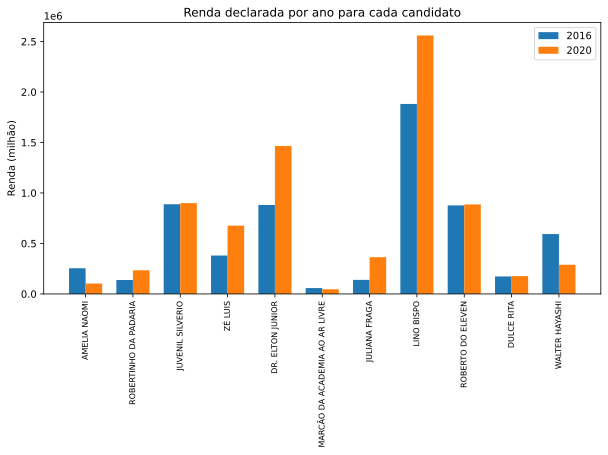

In [602]:
#Adicionando à um gráfico de barras para verificar alteração de patrimônio por candidato reeleito a cada ano

dicionario = {}
for x in range(11):
    listAux = []
    listAux.append(mergePatrimonio['VR_BEM_CANDIDATO2016'].values[x])
    listAux.append(mergePatrimonio['VR_BEM_CANDIDATO2020'].values[x])
    dicionario[mergePatrimonio['NM_URNA_CANDIDATO'].values[x]] = listAux

labels = []
values2016 = []
values2020 = []


for x in dicionario:
    values2016.append(dicionario[x][0])
    labels.append(x)
    
for y in dicionario:
    values2020.append(dicionario[y][1])

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, values2016, width, label='2016')
rects2 = ax.bar(x + width/2, values2020, width, label='2020')

ax.set_ylabel('Renda (milhão)')
ax.set_title('Renda declarada por ano para cada candidato')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=8)
ax.legend()



plt.show()